In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import Tensor

import plotly.offline as py
import plotly.graph_objs as go
import plotly

plt.style.use('dark_background')
sys.path.append(os.pardir)

In [2]:
from RRL.rrl_now import RRL

In [3]:
fivemin = pd.read_json('../data/bitflyer_btcjpy_300_seconds.json')

In [4]:
fivemin.index = fivemin.index.astype(int)
fivemin.sort_index(inplace=True)

In [5]:
fivemin[fivemin['ClosePrice']==0]

,ClosePrice,CloseTime,CloseTime[JST],CloseTime[UTC],HighPrice,LowPrice,OpenPrice,Volume[BTC],Volume[JPY]
1480,0,1519412700,1519445100000,1519412700000,0,0,0,0.0,0.0


In [6]:
fivemin.drop(1480,inplace=True)

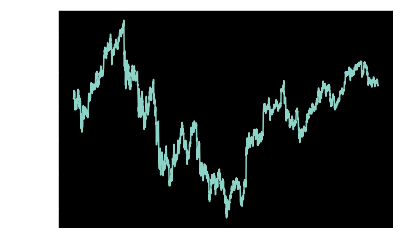

In [7]:
plt.plot(fivemin['ClosePrice'].values[:4000])

In [8]:
z = fivemin['ClosePrice'].values[:4000] / 1000

In [9]:
type(z)

numpy.ndarray

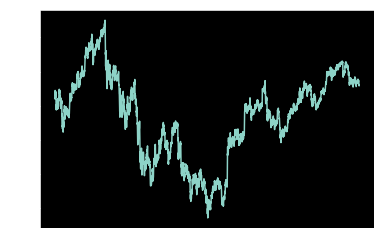

In [10]:
plt.plot(z)

In [20]:
rrl_=RRL_(eta=0.05, m=4, delta=0.001, rho=0.1, mu=1, alpha=0)

In [16]:
z_ = np.diff(z)
z_.shape

(1999,)

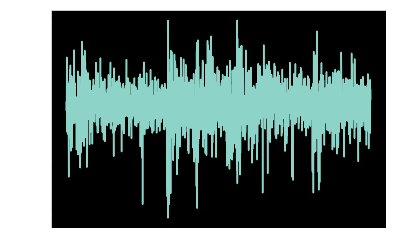

In [17]:
plt.plot(z_)

In [18]:
z_ = np.diff(z)
p=[]
for i in range(5,2000):
    tmp = list(z_[i-5:i])
    tmp_ = np.array(tmp[::-1])
    p.append(torch.from_numpy(tmp_).float())    

In [27]:
torch.from_numpy(z_).size()[0]

1999

In [23]:
print(len(p))
print(p[0], p[-1])
print(p[0][0],p[-1][0])

1995

1.00000e-03 *
  3.2230
  8.7710
  0.0700
 -0.9410
  0.6090
[torch.FloatTensor of size 5]
 
1.00000e-03 *
  1.1420
  2.9950
  2.8760
 -5.0310
  4.6770
[torch.FloatTensor of size 5]

0.003223000094294548 0.0011419999646022916


In [24]:
z_[4],z_[-1]

(0.0032229999999999759, 0.0011420000000001984)

In [25]:
diff=[]
par=[]
de=[]
for j in range(100):
    for i in range(len(p)):
        rrl_.fit(p[i])
        par.append(list(rrl_.parameters())[0].data[0])
        de.append(rrl_.delta_thetat[0])

/Users/Ryotaro/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.add_(other)


In [67]:
rrl_.rt


1.00000e-03 *
  1.1420
[torch.FloatTensor of size 1]

In [40]:
rrl_.input


1.00000e-03 *
  2.9950
  2.8760
 -5.0310
  4.6770
 -1.7290
[torch.FloatTensor of size 5]

In [55]:
list(range(3))

[0, 1, 2]

In [30]:
for i in range(1,21):
    cols = np.ceil(np.sqrt(i))
    rows = np.ceil(i / cols)
    print(i, rows, cols)

1 1.0 1.0
2 1.0 2.0
3 2.0 2.0
4 2.0 2.0
5 2.0 3.0
6 2.0 3.0
7 3.0 3.0
8 3.0 3.0
9 3.0 3.0
10 3.0 4.0
11 3.0 4.0
12 3.0 4.0
13 4.0 4.0
14 4.0 4.0
15 4.0 4.0
16 4.0 4.0
17 4.0 5.0
18 4.0 5.0
19 4.0 5.0
20 4.0 5.0


In [9]:
rrl=RRL(eta=0.05, m=4, delta=1, rho=0.1, mu=1, alpha=0)

In [16]:
rrl.fit(z,n_iter=400)

progress... 10 % , elapsed time... 112 sec
progress... 20 % , elapsed time... 232 sec
progress... 30 % , elapsed time... 335 sec
progress... 40 % , elapsed time... 439 sec
progress... 50 % , elapsed time... 540 sec
progress... 60 % , elapsed time... 640 sec
progress... 70 % , elapsed time... 741 sec
progress... 80 % , elapsed time... 843 sec
progress... 90 % , elapsed time... 946 sec
progress... 100 % , elapsed time... 1047 sec


In [ ]:
rrl.plot_results()

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



In [ ]:
rrl.plot_parameters()

In [34]:
%%time

n_iter = 100
for i in range(n_iter):
    rrl.fit(z)
    if (i+1)%10 == 0:
        print('progress... %i%%' %int(100*(i+1)/n_iter) )

progress... 10%
progress... 20%
progress... 30%
progress... 40%
progress... 50%
progress... 60%
progress... 70%
progress... 80%
progress... 90%
progress... 100%
CPU times: user 3min 48s, sys: 13.3 s, total: 4min 1s
Wall time: 4min


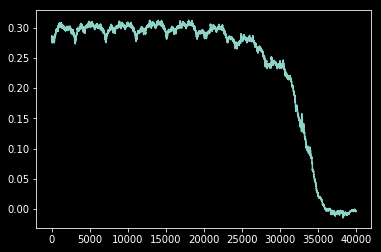

In [81]:
plt.plot(rrl.params_seq[0])

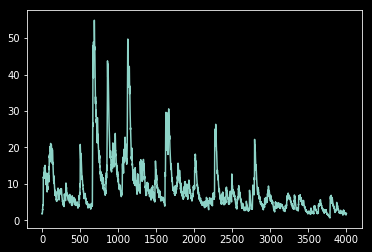

In [82]:
plt.plot(rrl.Bt_seq[-4000:])

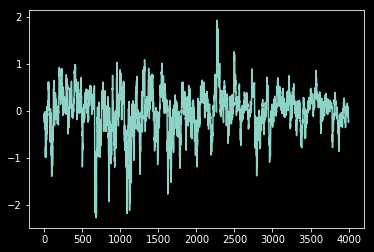

In [83]:
plt.plot(rrl.At_seq[-4000:])

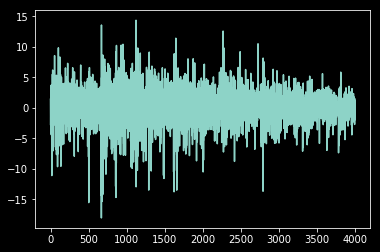

In [84]:
plt.plot(rrl.Rt_seq[-4000:])

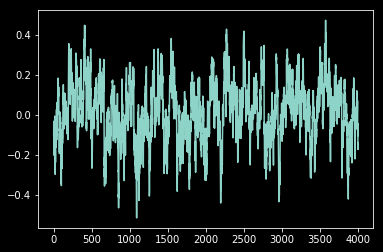

In [85]:
plt.plot(rrl.Ut_seq[-4000:])

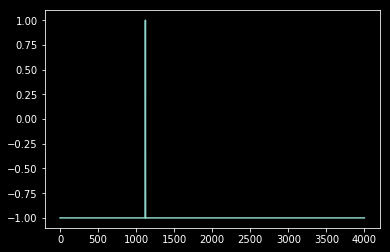

In [103]:
plt.plot(rrl.signal_seq[-4000:])

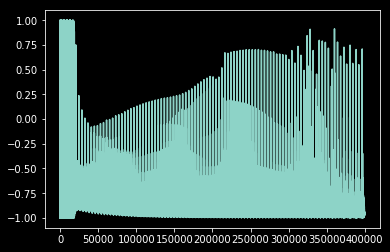

In [100]:
plt.plot(rrl.Ft_seq)

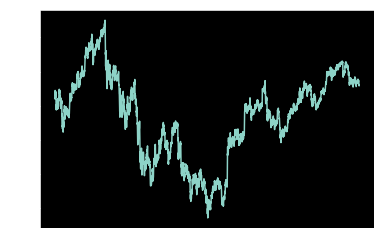

In [25]:
plt.plot(rrl.price_data)

In [95]:
print(np.mean(rrl.Ut_seq[:4000]))
print(np.mean(rrl.Ut_seq[-4000:]))

-0.260523653263
0.0147623


In [106]:
rrl.Ut_seq[0]


-0.2066
[torch.FloatTensor of size 1x1]

In [101]:
a = rrl.Ut_seq[:]
for i in range(len(rrl.Ut_seq)):
    a[i] = rrl.Ut_seq[i][0][0]

In [132]:
b = rrl.Ft_seq[:]
for i in range(len(rrl.Ft_seq)):
    b[i] = rrl.Ft_seq[i][0][0]